# Мощь средних 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [18]:
def norm_conf_int(alpha, mean_hat, std_hat, margin=5):
    """
        Строит 95% асимптотически-нормальный доверительный интервал
    """
    
    plt.figure(figsize=(10,5))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = stats.norm(mean_hat, std_hat).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)

    left, right = stats.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)
    
    for i in [left, right]: 
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)
        
        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)
        
        text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = stats.norm(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return left, right

__ЗБЧ:__ $\bar X_n \approx \mathbb{E}(X_i)$ при большем $n$ 


__Метод моментов__

$\mathbb{E}(X^k) = f(a)$

$f(a) = \bar{x^k} \Rightarrow \hat a = f^{-1} (\bar{x^k})$

__Упражнение 1 (про Шарика и Глафиру)__

Продавщица Глафира отдаёт псу Шарику в конце каждого дня нерасфасованные остатки мясного фарша. Фарш фасуется упаковками по $a$ грамм, поэтому нерасфасованный остаток в $i$-ый день, $X_i$, случаен и равномерно распределен на отрезке $[0;a]$. Пёс Шарик хорошо помнит все $X_1, \ldots, X_n$. Помогите псу Шарику найти оценку $a$ методом моментов.

____

__Модель:__  $X_1, \ldots, X_n \sim iid  U[0; a]$

__Эксперимент:__ Шарик каждый день ест мясо и запоминает сколько ему дали



__Союзник для оценивания:__ ЗБЧ, метод моментов

$$
\mathbb{E}(X_i) = \frac{a - 0}{2} \approx \bar{X}_n
$$

$$
\frac{\hat a}{2} = \bar{X}_n \Rightarrow \hat a = 2 \cdot \bar{X}_n
$$


__Упражнение 2 (про равномерное)__

$X_1, \ldots, X_n \sim iid  U[-a; a]$

$$
\mathbb{E}(X_i) = 0 \approx \bar{X}_n
$$

$$
\mathbb{E}(X_i) = \int_{-a}^a t \cdot f_X(t) dt = \int_{-a}^a t \cdot \frac{1}{2a} dt =  \frac{t^2}{4a} \mid_{-a}^a = \frac{a^2 - (-a)^2}{4a} = 0
$$



$$
\mathbb{E}(X^2_i) = \int_{-a}^a t^2 \cdot f_X(t) dt = \int_{-a}^a t^2 \cdot \frac{1}{2a} dt =  \frac{t^3}{6 a} \mid_{-a}^a = \frac{2a^3}{6 a} = \frac{a^2}{3} \approx \bar{x^2} \Rightarrow \hat a = \sqrt{3 \cdot \bar{x^2}} 
$$

__Упражнение 3 (про равномерное)__

$X_1, \ldots, X_n \sim iid  U[a; b]$

$$
\mathbb{E}(X) = \bar{x}
$$
$$
\mathbb{Var}(X) = \bar{x^2} - (\bar x)^2
$$

# А насколько эта оценка хороша? 

__Предиктивный интервал -__ интервал внутри которого лежит случайная величина с какой-то вероятностью. Границы это какие-то числа. 


$X \sim N(\mu, \sigma^2)$


$ \mathbb{P}(\mu - \sigma \le X \le \mu + \sigma) \approx 0.687  $

$ \mathbb{P}(\mu - 2\cdot\sigma \le X \le \mu + 2 \cdot \sigma) \approx 0.95 $

$ \mathbb{P}(\mu - 3 \cdot \sigma \le X \le \mu + \cdot \sigma) \approx 0.997 $

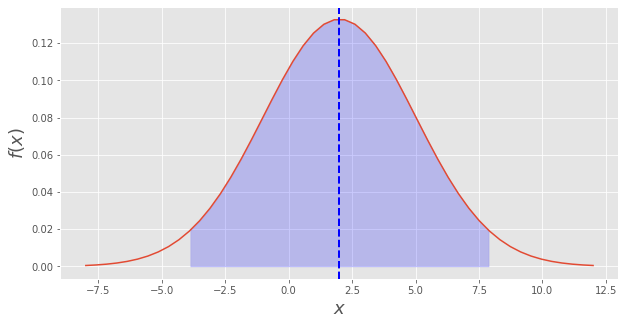

In [12]:
margin = 10
mean_hat = 2
std_hat = 3

q = 1.96

plt.figure(figsize=(10,5))
xs = np.linspace(mean_hat - margin, mean_hat + margin)
pdf = stats.norm(mean_hat, std_hat).pdf(xs)

plt.plot(xs, pdf)
plt.axvline(mean_hat, color='blue', linestyle="--", lw=2)

xq = np.linspace(mean_hat - q*std_hat, mean_hat + q*std_hat)
yq = stats.norm(mean_hat, std_hat).pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.ylabel('$f(x)$', fontsize=18)
plt.xlabel('$x$', fontsize=18);

__Доверительный интервал__ - интервал для неизвестного параметра. Его границы это случайные величины. И эти случайные величины покрывают неизвестный параметр с какой-то вероятностью.  

Доверительный интервал нужен, чтобы понимать насколько точной получилась наша оценка неизвестного параметра. 

$\hat a = 2 \cdot \bar{X}_n$ - это точечная оценка. Хотелось бы понять, насколько сильно от неё может откланяться реальное значение $a$.

In [17]:
uniform_rv = stats.uniform(0, 100)
X = uniform_rv.rvs(14)
2*X.mean()

103.86070953567626

__Разные формы записи ЦПТ:__

$$
\bar X_n \overset{asy}{\sim} N \left( \mathbb{E}(X_i), \frac{Var(X_i)}{n} \right)
$$

$$
\bar X_n - \mathbb{E}(X_i) \overset{asy}{\sim} N \left( 0, \frac{Var(X_i)}{n} \right)
$$

$$
\frac{\bar X_n - \mathbb{E}(X_i)}{ \sqrt{\frac{Var(X_i)}{n}}} \overset{asy}{\sim} N \left( 0, 1 \right)
$$

$$
\sqrt{n} \cdot \frac{\bar X_n - \mathbb{E}(X_i)}{ \sqrt{Var(X_i)}} \overset{asy}{\sim} N \left( 0, 1 \right)
$$

__Свойства нормального распределения:__

$X \sim N(\mu_1, \sigma^2_1)$

$Y \sim N(\mu_2, \sigma^2_2)$





- $4X \sim N(4 \mu_1, 16 \sigma^2_1)$
- $X + Y \sim  N(\mu_1 + \mu_2, \sigma_1^2 + \sigma^2_2 + 2 Cov(X, Y))$
- $X - Y \sim  N(\mu_1 - \mu_2, \sigma_1^2 + \sigma^2_2 - 2 Cov(X, Y))$ 
- $\frac{X}{Y}\sim Cauchy(\gamma, m)$

$\mathbb{E}(4X) = 4 \mathbb{E}(X) = 4 \mu_1$

$Var(4X) =16 Var(X) = 16 \sigma_1^2$

$Var(X - Y) = Cov(X-Y, X-Y) = Var(X) - 2 Cov(X, Y)+ Var(Y) $

Давайте наконец поймём как построить доверитальный интервал для объёма упаковки!

__Модель:__  $X_1, \ldots, X_n \sim iid  U[0; a]$

$$\mathbb{E}(X_i) = \frac{a}{2}$$

$$Var(X_i) = \frac{a^2}{12}$$

__ЦПТ:__

$$
\bar X_n \overset{asy}{\sim} N \left(\frac{a}{2}, \frac{a^2}{12n} \right)
$$

$$
\hat a = 2 \bar X_n \overset{asy}{\sim} N \left(a, \frac{a^2}{3n} \right)
$$

Оценка несмещённая: $\mathbb{E}(\hat a) = \mathbb{E}(2 \bar X_n) = a$

Оценка состоятельная: $2 \bar{X}_n \overset{asy}{\to} 2 \cdot \frac{a}{2} = a$ (напрямую воспользовался ЗБЧ)

Эффективная - ???  ХЗ, надо проверять 

__95% gредиктивный интервал для случайной величины $\hat a$:__

$$
\mathbb{P} \left(a - z_{1-\frac{\alpha}{2}} \cdot \sqrt{\frac{a^2}{3n}} \le \hat a \le a + z_{1-\frac{\alpha}{2}} \cdot \sqrt{\frac{a^2}{3n}} \right) \approx 1 - \alpha
$$


Среди этих двух ребят я хочу дружить с Анфисов, её прогнозы адекватнее!

__Петя:__ завтра температура за окном будет от -273 до 10 градусов с вероятностью 0.95

__Анфиса:__ завтра температура за окном будет от -5 до 15 градусов с вероятностью 0.95

(-1.959963984540054, 1.959963984540054)

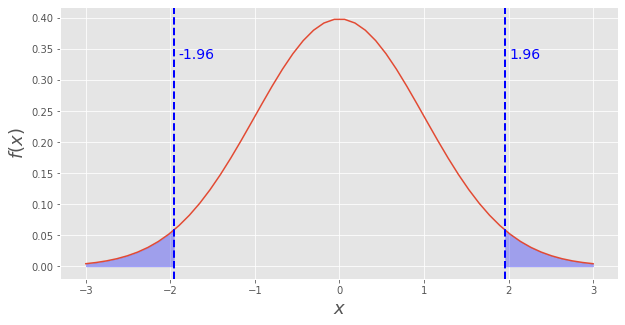

In [22]:
norm_conf_int(0.05, 0, 1, margin=3)

__95% доверительный интервал для неизвестного параметра $a$:__

$$
\mathbb{P} \left(\hat a - z_{1-\frac{\alpha}{2}} \cdot \sqrt{\frac{a^2}{3n}} \le a \le \hat a + z_{1-\frac{\alpha}{2}} \cdot \sqrt{\frac{a^2}{3n}} \right) \approx 1 - \alpha
$$

Проблема: я не знаю стандартных отклонений :( 

$$
\mathbb{P} \left(\hat a - z_{1-\frac{\alpha}{2}} \cdot \sqrt{\frac{\hat a^2}{3n}} \le a \le \hat a + z_{1-\frac{\alpha}{2}} \cdot \sqrt{\frac{\hat a^2}{3n}} \right) \approx 1 - \alpha
$$

In [33]:
from tqdm.notebook import tqdm
a = 100
uniform_rv = stats.uniform(0, a)

n_obs = 100000
zq = 1.96

n = 100
cnt = 0
for i in tqdm(range(n_obs)):
    X = uniform_rv.rvs(n)
    a_hat = 2*X.mean()
    std_hat = np.sqrt(a_hat**2/(3*n))
    if (a_hat - zq*std_hat) < a < (a_hat + zq*std_hat):
        cnt += 1

cnt/n_obs

  0%|          | 0/100000 [00:00<?, ?it/s]

0.94758

# А какой скорее всего размер у упаковки с мясом? 


In [39]:
def asy_mean_test(mean_hat, std_hat, mu_0=0, 
                   alpha=0.05, alternative='two-sided', margin=3):
    """
        Асимптотический тест для равенства средних
    """
    
    z_obs = (mean_hat - mu_0)/std_hat
    
    if alternative == 'two-sided':
        p_value = 2 * (1 - stats.norm().cdf(np.abs(z_obs)))
        z_crit = stats.norm().ppf(1 - alpha/2)
        
        statistics = ['-z_crit', 'z_crit', '-z_obs', 'z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (z_crit, 0.05, z_crit, margin, 'b'),
                                       (-z_obs, -0.6, -margin, -z_obs, 'r'), 
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    if alternative == 'less':
        p_value = stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)
        
        statistics = ['-z_crit', '-z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (-z_obs, -0.6, -margin, -z_obs, 'r')]))

    if alternative == 'larger':
        p_value = 1 - stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)
        
        statistics = ['z_crit', 'z_obs']
        params = dict(zip(statistics, [(z_crit, 0.05, z_crit, margin, 'b'),
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    
    plt.figure(figsize = (10, 5))
    x = np.linspace(-margin, margin)
    pdf = stats.norm().pdf(x)

    plt.plot(x, pdf, color="black")
    plt.ylabel("$f(x)$", fontsize=16)
    plt.xlabel("$x$", fontsize=16)
    y_max = plt.ylim()[1]
    
    for i in range(len(statistics)):
        statistic, text_margin, left_bound, right_bound, color = params[statistics[i]]
        
        plt.axvline(statistic, color=color, linestyle="--", lw=2)
        h = 0.8 if statistics[i].split('_')[-1] == 'crit' else 0.6
        plt.text(statistic + text_margin, 
                 h*y_max, round(statistic, 2), color=color, fontsize=16)
        
        xq = np.linspace(left_bound, right_bound)
        yq = stats.norm().pdf(xq)
        plt.fill_between(xq, 0, yq, color=color, alpha=0.2)
    
    return p_value

А как проверить гипотезу о том, что $a$ равна какому-то значению? 


$H_0: a = 100$

$H_1: a \ne 100$

Гипотезы мы всегда будем проверять отталкиваясь от статуса-кво. То есть мы всегда верим в нулевую гипотезу и ищем доказательства того, что она это полный булщит. 

$$
\hat a \overset{H_0}{\sim} N \left(100, \frac{\hat a^2}{3n} \right) \approx N \left(100, \frac{100^2}{3n} \right)
$$

$$
\hat a - 100 \overset{H_0}{\sim} N \left(0, \frac{\hat a^2}{3n} \right)
$$

$$
T = \frac{\hat a - 100}{\sqrt{\frac{\hat a^2}{3n}}} \overset{H_0}{\sim} N \left(0, 1 \right)
$$

In [83]:
a = 120
uniform_rv = stats.uniform(0, a)

n = 500
x = uniform_rv.rvs(n)

In [84]:
a_hat = 2*x.mean()
std_hat = (2*x.mean())**2/(3*n)

(a_hat - 100)/std_hat

1.7330764651371064

0.08308207881229634

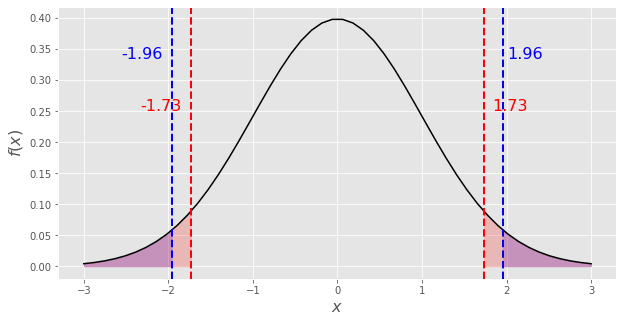

In [85]:
asy_mean_test(a_hat, std_hat, mu_0=100, 
                   alpha=0.05, alternative='two-sided', margin=3)